# E-Commerce 판매자(공급)데이터 불러오기 & 전처리

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
# 데이터 불러오고 전처리하기
vendor_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_meta_data.csv"
vendor_statsdata_url ="https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_stats_data.csv"

vendor_metadata_df = pd.read_csv(vendor_metadata_url, parse_dates=[0])
vendor_stats_df = pd.read_csv(vendor_statsdata_url, parse_dates=[0])

In [3]:
vendor_metadata_df.shape, vendor_stats_df.shape

((4588, 7), (4588, 11))

In [4]:
vendor_metadata_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25
2,CJ8MPRrVm66EPmG,False,2016-11-19,96,10,1600.0,0.04
3,svRpN9sEzk8r7Ws,True,2019-05-16,329,20,1900.0,0.11
4,refHs4aaigBf2DN,True,2019-03-17,1664,48,1300.0,0.08


In [5]:
vendor_stats_df.head()

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


In [6]:
# 컬럼의 데이터 타입 확인하기
vendor_metadata_df.dtypes

vendor_id             object
if_affiliation          bool
joined_date           object
bookmark_cnt           int64
item_cnt               int64
base_shipping_fee    float64
commission_rate      float64
dtype: object

### 전처리하기

In [7]:
# 등록일자를 사용하여 2021년 1월 1일 기준 판매자의 등록 기간 생성하기
today_ymd = datetime(2021,1,1)

# 가입일자의 포멧을 날짜형식으로 변경하기
vendor_metadata_df["joined_date"] = vendor_metadata_df["joined_date"].astype("datetime64[ns]")

# 가입기간을 일로 계산하기
vendor_metadata_df["days_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"]).dt.days

# 가입기간을 년도로 계산하기
vendor_metadata_df["years_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"])/np.timedelta64(1, "Y")
vendor_metadata_df["years_from_joined"] = vendor_metadata_df["years_from_joined"].round(1)
vendor_metadata_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22,436,1.2
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25,432,1.2
2,CJ8MPRrVm66EPmG,False,2016-11-19,96,10,1600.0,0.04,1504,4.1
3,svRpN9sEzk8r7Ws,True,2019-05-16,329,20,1900.0,0.11,596,1.6
4,refHs4aaigBf2DN,True,2019-03-17,1664,48,1300.0,0.08,656,1.8


In [8]:
# 가맹가능여부(if_affiliation) 수치화
vendor_metadata_df["if_affiliation"] = vendor_metadata_df["if_affiliation"].map({True:0, False:1})

In [9]:
# 컬럼의 데이터 타입 확인하기
vendor_stats_df.dtypes

vendor_id             object
weekly_order_cnt     float64
monthly_order_cnt    float64
total_order_cnt        int64
total_user_cnt         int64
avg_cost             float64
avg_delivery_cost    float64
roas_growth_rate     float64
review_score         float64
review_rate          float64
review_reply_rate    float64
dtype: object

In [10]:
# 컬럼별 분위수, 최소, 최대값 확인
vendor_stats_df.describe()

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
count,4588.000000,4588.000000,4588.000000,4588.000000,4.588000e+03,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,3.795475,14.177786,177.446164,98.865083,3.560237e+04,4643.405785,0.318578,3.391120,0.571561,0.450767
std,7.122223,34.124848,651.841714,290.684361,3.101888e+04,2900.976243,0.114186,1.108313,0.121400,0.133586
min,1.000000,1.000000,12.000000,1.000000,6.204545e+03,0.000000,0.000000,-0.310000,0.030000,0.000000
25%,1.380000,2.820000,21.000000,15.000000,2.374900e+04,2082.770270,0.241364,2.640000,0.490000,0.360000
50%,2.100000,6.250000,43.000000,29.000000,2.997150e+04,5017.534213,0.318724,3.400000,0.570000,0.450000
75%,3.800000,13.762500,113.000000,73.000000,4.036186e+04,6816.387560,0.396785,4.160000,0.650000,0.540000
max,216.710000,1052.570000,22104.000000,8272.000000,1.047716e+06,77846.153846,0.724674,7.660000,0.980000,0.920000


In [11]:
# Null 값 살펴보기
vendor_metadata_df.isnull().sum(axis=0)

vendor_id            0
if_affiliation       0
joined_date          0
bookmark_cnt         0
item_cnt             0
base_shipping_fee    0
commission_rate      0
days_from_joined     0
years_from_joined    0
dtype: int64

In [12]:
# vendor_id 기준으로 중복 데이터 확인
vendor_metadata_df[vendor_metadata_df.duplicated(["vendor_id"])]

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined


In [13]:
# 가맹여부별 판매자 분포 파악
vendor_metadata_df.groupby(["if_affiliation"])[["vendor_id"]].count().reset_index()

,if_affiliation,vendor_id
0,0,2836
1,1,1752


In [14]:
# 등록기간에 따른 고객분포 확인
vendor_cnt_from_joined_df = vendor_metadata_df.groupby(["years_from_joined"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_cnt_from_joined_df, x="years_from_joined", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [15]:
# 등록한 아이템/상품수 분포를 Bar plot으로 확인하기
vendor_item_cnt_df = vendor_metadata_df.groupby(["item_cnt"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_item_cnt_df, x="item_cnt", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [16]:
# 위의 Plot을 Box plot으로 확인
fig = px.box(vendor_metadata_df, y="item_cnt", points="all")
fig.show()

In [17]:
# 수수료율의 분포를 Bar plot으로 확인
vendor_comm_rate_df = vendor_metadata_df.groupby(["commission_rate"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_comm_rate_df, x="commission_rate", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [18]:
# 판매자 데이터 변수 간 상관계수 살펴보기
corr_matrix = vendor_metadata_df.corr()
corr_matrix

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,0.166854,0.079686,-0.004122,-0.106717,0.638232,0.638125
bookmark_cnt,0.166854,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279422
item_cnt,0.079686,0.008374,1.000000,0.231289,0.021084,0.102564,0.102676
base_shipping_fee,-0.004122,-0.003479,0.231289,1.000000,0.451113,0.000226,0.000068
commission_rate,-0.106717,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160044
days_from_joined,0.638232,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999897
years_from_joined,0.638125,0.279422,0.102676,0.000068,-0.160044,0.999897,1.000000


In [19]:
# 상관계수 중 상대적/비교적으로 높은 것 찾기
corr_matrix[abs(corr_matrix)>=0.4]

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,NaN,NaN,NaN,NaN,0.638232,0.638125
bookmark_cnt,NaN,1.0,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,NaN,1.0,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,NaN,1.000000,0.451113,NaN,NaN
commission_rate,NaN,NaN,NaN,0.451113,1.000000,NaN,NaN
days_from_joined,0.638232,NaN,NaN,NaN,NaN,1.000000,0.999897
years_from_joined,0.638125,NaN,NaN,NaN,NaN,0.999897,1.000000


In [20]:
# base_shipping_fee & commission_rate 관계를 나타내는 scatter plot 그리기
fig = px.scatter(x=vendor_metadata_df["base_shipping_fee"], y=vendor_metadata_df["commission_rate"])
fig.update_layout(width=600, height=500)
fig.show()

In [21]:
# 가맹여부에 따른 변수별 평균값 차이 확인
vendor_metadata_df.groupby("if_affiliation").mean()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,,,,,,
0,905.391044,86.015515,2095.169252,0.238011,1002.209803,2.744217
1,1171.159247,97.490297,2090.981735,0.208094,1935.946918,5.303995


### 메타데이터 훈련을 위한 정제

In [22]:
# 판매자 메타데이터에서 군집분석을 위한 변수만 남기기
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
vendor_numerics_df = vendor_metadata_df.select_dtypes(include=numerics_types)
vendor_numerics_df.head(2)

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0,74,126,2000.0,0.22,436,1.2
1,0,1592,114,1600.0,0.25,432,1.2


In [23]:
# 군집화에서 binary 변수와 일반 숫자변수를 혼용해서 훈련시키는 것은 지양.
# binary 변수 제거
user_numerics_cols = [col for col in vendor_numerics_df if np.isin(vendor_numerics_df[col].unique(), [0,1]).all()]
vendor_numerics_df = vendor_numerics_df.drop(user_numerics_cols, axis=1)                                                                   
vendor_numerics_df.head(2)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,74,126,2000.0,0.22,436,1.2
1,1592,114,1600.0,0.25,432,1.2


In [24]:
# 남겨진 변수의 평균, 분산 등의 정보 확인
vendor_numerics_df.describe()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,1006.878814,90.397341,2093.570183,0.226587,1358.772014,3.721709
std,773.946202,69.969414,493.648413,0.136219,710.869467,1.949129
min,0.000000,0.000000,400.000000,0.000000,381.000000,1.000000
25%,389.000000,36.000000,1800.000000,0.120000,585.000000,1.600000
50%,845.000000,76.000000,2100.000000,0.210000,1404.500000,3.800000
75%,1448.250000,129.000000,2400.000000,0.320000,2034.000000,5.600000
max,4710.000000,430.000000,3900.000000,0.790000,2447.000000,6.700000


### 메타데이터 정규화

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# MinMaxScaler 사용하여 고객 메타데이터의 값들을 0, 5사이의 값으로 정규화
mm_scaler = MinMaxScaler(feature_range=(0,5))
scaled_vendor_metadata = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_metadata_df = pd.DataFrame(scaled_vendor_metadata, columns=vendor_numerics_df.columns)
scaled_vendor_metadata_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.078556,1.465116,2.285714,1.392405,0.133107,0.175439
1,1.690021,1.325581,1.714286,1.582278,0.123427,0.175439
2,0.101911,0.116279,1.714286,0.253165,2.717812,2.719298
3,0.349257,0.232558,2.142857,0.696203,0.520329,0.526316
4,1.766454,0.558140,1.285714,0.506329,0.665537,0.701754


In [27]:
train_df, test_df = train_test_split(scaled_vendor_metadata_df, test_size=0.1)
len(train_df), len(test_df)

(4129, 459)

In [28]:
# 최적의 K 찾기
from sklearn.cluster import KMeans

In [29]:
distortions = []
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)
distortions

[35020.641589827326,
 14598.184964356456,
 11823.914015183142,
 10638.123579804082,
 9621.72351164584,
 8657.789911766751,
 8056.5748837118235,
 7589.2701389159665,
 7170.399259673223,
 6804.193283805873]

In [30]:
# elbow method graph
# x축이 k의 수, y축이 distortions인 line plot
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

In [31]:
km = KMeans(n_clusters=3)
km.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# 군집의 변수 별 중심값
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.955490,0.987594,2.411167,1.583805,0.512260,0.546103
1,1.575269,1.187332,2.420937,1.260077,4.370712,4.379543
2,0.639442,0.976681,2.407498,1.408156,2.721514,2.738668


In [33]:
# 군집별 데이터 수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1659], [1, 1365], [2, 1105]]

In [34]:
# k를 변경해서 KMeans 확인
km = KMeans(n_clusters=4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.778639,1.130759,2.415143,1.345659,3.606593,3.617223
1,1.003412,0.980552,2.399981,1.593111,0.409463,0.443384
2,2.061485,1.146925,2.390547,1.220165,4.647738,4.657633
3,0.588904,0.964410,2.463694,1.457095,2.008291,2.031719


In [35]:
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1117], [1, 1483], [2, 804], [3, 725]]

In [36]:
# 정규화된 메타데이터로 최적의 k 찾기
from yellowbrick.cluster import SilhouetteVisualizer

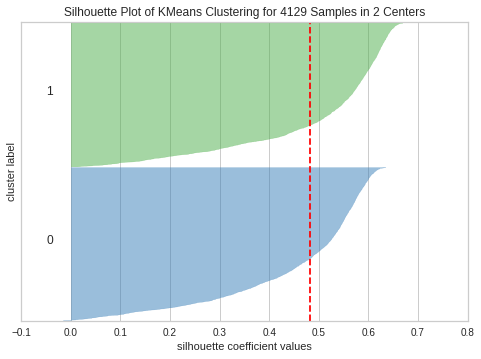

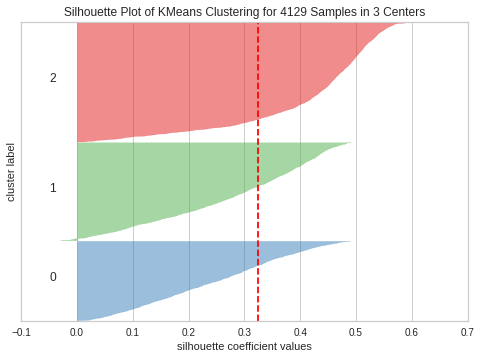

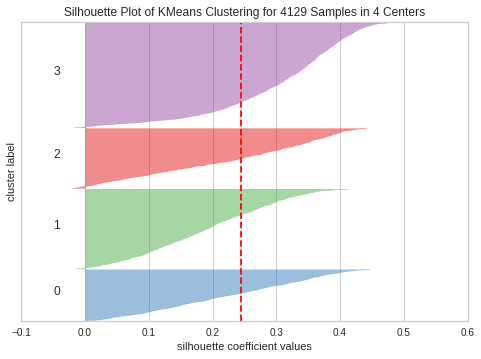

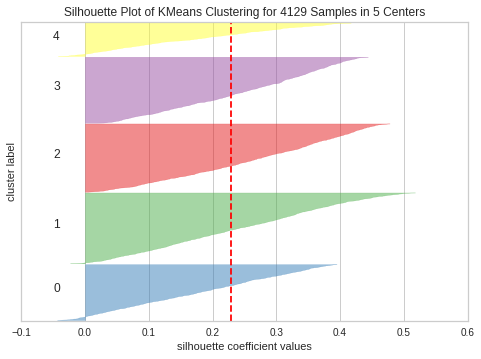

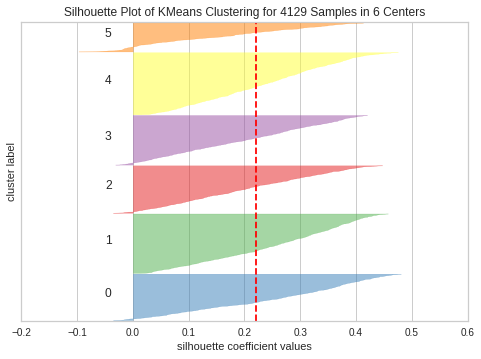

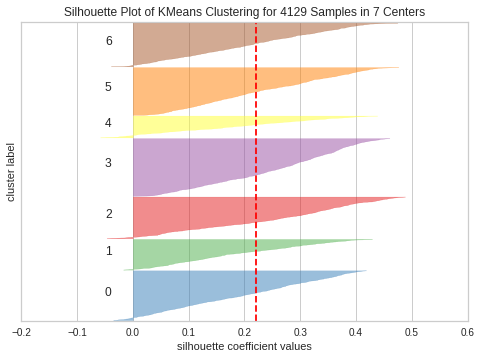

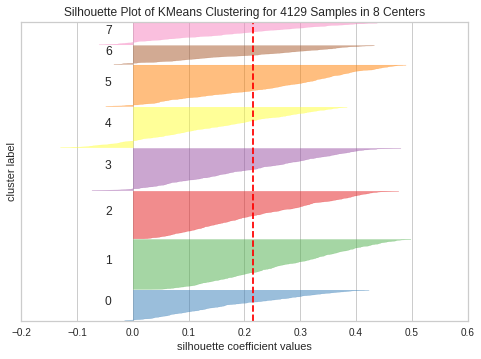

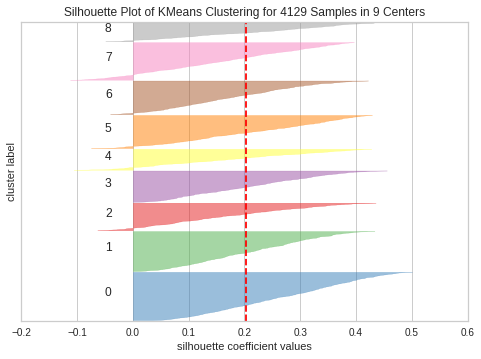

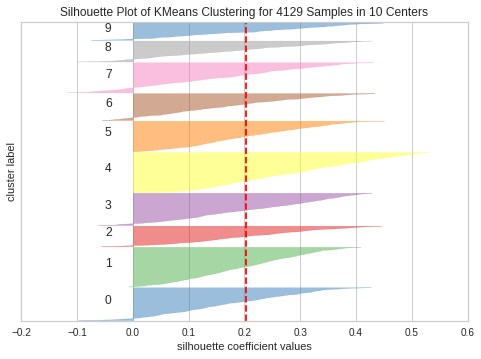

In [37]:
k_range = range(2,11)
for i in k_range:
  km = KMeans(n_clusters=i, init="k-means++")
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_df)
  visualizer.poof()

In [38]:
# k의 값을 변경하여 군집의 중심값을 비교
km_model = KMeans(n_clusters=3)
km_model.fit(train_df)
pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.639442,0.976681,2.407498,1.408156,2.721514,2.738668
1,1.575269,1.187332,2.420937,1.260077,4.370712,4.379543
2,0.955490,0.987594,2.411167,1.583805,0.512260,0.546103


### 판매자(메타데이터) - Agglomerative 훈련시키기

In [39]:
from sklearn.cluster import AgglomerativeClustering
agg1 = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity="euclidean").fit(train_df)
agg1

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [40]:
# 훈련된 라벨 변수에 저장
agg1_labels = agg1.labels_

# KMeans와 Agglomerative 알고리즘 결과 차이의 시각화
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-Means cluster", "Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"],
               y=train_df["years_from_joined"],
               mode="markers",
               marker=dict(color=km_model.labels_),
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"],
               y=train_df["years_from_joined"],
               mode="markers",
               marker=dict(color=agg1.labels_),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 훈련된 모델에 test set을 사용하여 predict하기

In [41]:
test_vendor_metadata_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_metadata_label_df["label_from_km"] = test_cluster

In [42]:
test_cluster = agg1.fit_predict(test_df)
test_vendor_metadata_label_df["label_from_agg1"] = test_cluster

In [43]:
test_vendor_metadata_label_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,label_from_km,label_from_agg1
2075,0.435244,0.197674,2.285714,1.202532,0.307357,0.350877,0,0
4288,1.765393,0.034884,2.571429,0.822785,2.541142,2.543860,2,3
3103,0.885350,0.069767,2.142857,0.949367,0.341239,0.350877,0,0
1474,0.135881,3.232558,1.142857,1.139241,0.169409,0.175439,0,0
1169,2.697452,0.627907,2.714286,1.898734,3.252662,3.245614,1,1


In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-Means cluster", "Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"],
               y=test_vendor_metadata_label_df["years_from_joined"],
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_km"]),
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"],
               y=test_vendor_metadata_label_df["years_from_joined"],
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_agg1"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 판매자(공급)컨설팅에 활용할 그룹으로 군집화(거래데이터 활용)

In [45]:
# 판매자 거래데이터 살펴보기
vendor_stats_df.head()   

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


In [46]:
corr_matrix = vendor_stats_df.corr()
corr_matrix

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209
avg_cost,-0.034530,-0.034132,-0.002231,-0.008073,1.000000,0.347557,0.003964,0.012409,0.010270,-0.008317
avg_delivery_cost,-0.100294,-0.087311,0.029267,0.013124,0.347557,1.000000,-0.015499,0.004110,0.024460,-0.007112
roas_growth_rate,0.126901,0.131289,0.117747,0.137139,0.003964,-0.015499,1.000000,0.738310,0.020874,0.442410
review_score,0.099584,0.101787,0.088232,0.099840,0.012409,0.004110,0.738310,1.000000,0.133786,0.096454
review_rate,0.122862,0.128190,0.128882,0.143133,0.010270,0.024460,0.020874,0.133786,1.000000,0.593493
review_reply_rate,0.254062,0.264406,0.253386,0.288209,-0.008317,-0.007112,0.442410,0.096454,0.593493,1.000000


In [47]:
corr_matrix[abs(corr_matrix)>=0.4]

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
avg_delivery_cost,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
roas_growth_rate,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.73831,NaN,0.442410
review_score,NaN,NaN,NaN,NaN,NaN,NaN,0.73831,1.00000,NaN,NaN
review_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.593493
review_reply_rate,NaN,NaN,NaN,NaN,NaN,NaN,0.44241,NaN,0.593493,1.000000


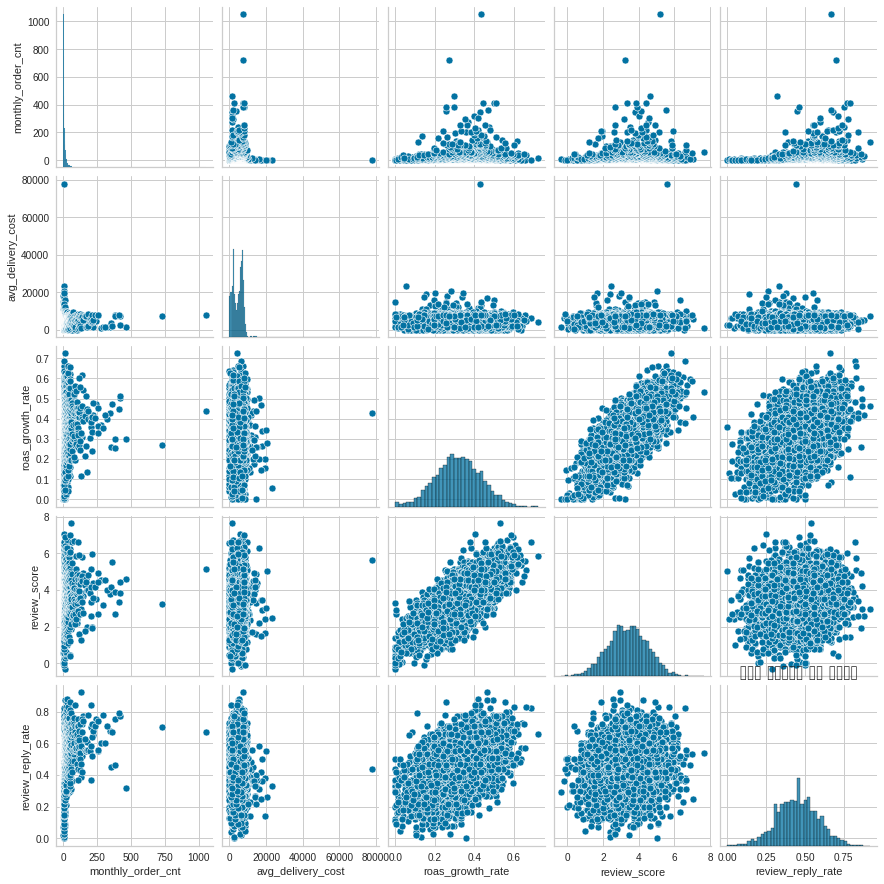

In [48]:
# 상관관계 기반 변수 선택하여 Scatter plot 그리기
sns.pairplot(vendor_stats_df[["monthly_order_cnt", "avg_delivery_cost","roas_growth_rate", "review_score", "review_reply_rate"]])
plt.title("판매자 거래데이터 변수 상관관계", fontsize=20)
plt.show()

In [49]:
# HDBSCAN
!pip install hdbscan

     |████████████████████████████████| 6.4MB 8.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311687 sha256=03379596fb9023f093497019b2c09601f3faa2529e25f634586ecbb533f578a1
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [50]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼 선택
vendor_stats_df.columns

Index(['vendor_id', 'weekly_order_cnt', 'monthly_order_cnt', 'total_order_cnt',
       'total_user_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate'],
      dtype='object')

In [51]:
# 선택한 컬럼으로 데이터셋 나누기
vendor_numerics_df = vendor_stats_df[["monthly_order_cnt", "avg_cost", "avg_delivery_cost",'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate']]

In [52]:
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_stats = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_stats_df = pd.DataFrame(scaled_vendor_stats, columns=vendor_numerics_df.columns)
scaled_vendor_stats_df.head()

,monthly_order_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,0.023774,0.086391,0.058877,0.720692,1.706399,1.894737,0.217391
1,0.023774,0.195447,0.000000,0.656382,0.878294,2.210526,0.706522
2,0.002377,0.075229,0.473691,1.996456,2.509410,2.526316,1.195652
3,0.014264,0.074909,0.131135,1.223478,1.888331,2.368421,0.326087
4,0.006657,0.075830,0.112401,0.673268,0.897114,2.473684,1.413043


In [53]:
train_df, test_df = train_test_split(scaled_vendor_stats_df, test_size=0.1)

In [54]:
len(train_df), len(test_df)

(4129, 459)

In [55]:
hdb_data_df = train_df.copy()

In [56]:
import hdbscan

In [57]:
# min_samples 파라미터 비교하는 함수 정의

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt", y_col="avg_delivery_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세 확인
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples{ms} > label 수 : {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [58]:
ms_list = [1, 3, 5, 7]
hdb_data_df = opt_hdbscan(train_df, ms_list, hdb_data_df, min_cluster_size=5, label_name="hdbscan_label", x_col="monthly_order_cnt", y_col="avg_delivery_cost")

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.385430  0.301685           0.400338   
0                       0.020797  0.135103           0.288172   
1                       0.009215  0.098490           0.343968   
2                       0.013527  0.152943           0.259928   
3                       0.050001  0.135840           0.293421   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.360673      2.491041     2.923633           2.607275   
0                      0.105014      0.395232     1.989474           1.500000   
1                      0.508720      0.509410     1.147368           1.163043   
2                      1.242288      1.788582     1.268421           0.516304   
3                      2.190744      2.315611     2.853760

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.321096  0.283725           0.402436   
0                       0.008758  0.095632           0.354178   
1                       0.050169  0.135383           0.292350   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.210501      2.336668     2.912376           2.538484   
0                      0.555075      0.744040     1.242105           0.956522   
1                      2.191302      2.317363     2.848479           2.445031   

               point_cnt  
hdbscan_label             
-1                   185  
0                      5  
1                   3939  


               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.084973  0.157289           0.304449   
0                       0.039084  0.093892           0.364587   
1                       0.046730  0.109671           0.304764   
2                       0.038537  0.126077           0.289849   
3                       0.031210  0.143108           0.241998   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.222427      2.332467     2.851414           2.481008   
0                      3.242349      2.721455     3.673684           3.750000   
1                      3.587912      2.937265     2.905263           3.369565   
2                      2.148937      2.296442     2.848117           2.407866   
3                      2.677684      2.452949     1.631579

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.073391  0.149445           0.299789   
0                       0.022728  0.101795           0.275706   
1                       0.036549  0.124781           0.291235   
2                       0.006379  0.108708           0.399920   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.204605      2.326372     2.848502           2.458016   
0                      1.338261      2.022585     2.484211           1.293478   
1                      2.164571      2.299094     2.856055           2.430320   
2                      1.207225      1.255751     2.219298           1.811594   

               point_cnt  
hdbscan_label             
-1                  2888  
0                      5  
1             

### 메타데이터 - 거래데이터 합쳐서 군집화 모델 훈련

In [59]:
vendor_df = vendor_metadata_df.set_index("vendor_id").join(vendor_stats_df.set_index("vendor_id"), how="left").reset_index()

In [60]:
vendor_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,0,2019-10-23,74,126,2000.0,0.22,436,1.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,0,2019-10-27,1592,114,1600.0,0.25,432,1.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1,2016-11-19,96,10,1600.0,0.04,1504,4.1,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,0,2019-05-16,329,20,1900.0,0.11,596,1.6,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,0,2019-03-17,1664,48,1300.0,0.08,656,1.8,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


In [61]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
vendor_df = vendor_df.select_dtypes(include=numerics_types)

In [62]:
# binary 변수 제거
vendor_numerics_cols = [col for col in vendor_df if np.isin(vendor_df[col].unique(), [0,1]).all()]
vendor_df = vendor_df.drop(vendor_numerics_cols, axis=1)
vendor_df.head(2)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,74,126,2000.0,0.22,436,1.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,1592,114,1600.0,0.25,432,1.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13


### EDA : 판매자 - 변수 간 상관관계 살펴보기

In [63]:
corr_matrix = vendor_df.corr()
corr_matrix

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279422,0.072095,0.077554,0.087223,0.084376,0.041657,0.111470,0.005495,0.020923,-0.005973,0.000093
item_cnt,0.008374,1.000000,0.231289,0.021084,0.102564,0.102676,0.008679,0.009463,0.020910,0.013952,0.026073,0.067542,-0.002205,-0.003903,0.002345,0.001733
base_shipping_fee,-0.003479,0.231289,1.000000,0.451113,0.000226,0.000068,-0.012643,-0.011599,-0.016639,-0.012127,-0.011963,-0.007464,0.021662,-0.000108,-0.009305,0.026350
commission_rate,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160044,0.012362,0.009663,-0.018601,-0.017540,-0.043063,-0.122915,0.004651,-0.002336,-0.013590,-0.006923
days_from_joined,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999897,-0.016804,0.007704,0.147791,0.149763,0.191498,0.666056,0.039959,0.034414,0.063356,0.105253
years_from_joined,0.279422,0.102676,0.000068,-0.160044,0.999897,1.000000,-0.016461,0.007985,0.147926,0.149865,0.191253,0.665834,0.039706,0.034071,0.063541,0.105533
weekly_order_cnt,0.072095,0.008679,-0.012643,0.012362,-0.016804,-0.016461,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.077554,0.009463,-0.011599,0.009663,0.007704,0.007985,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.087223,0.020910,-0.016639,-0.018601,0.147791,0.147926,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.084376,0.013952,-0.012127,-0.017540,0.149763,0.149865,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209


In [64]:
corr_matrix[abs(corr_matrix)>=0.4]

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,1.000000,0.451113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commission_rate,NaN,NaN,0.451113,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,1.000000,0.999897,NaN,NaN,NaN,NaN,NaN,0.666056,NaN,NaN,NaN,NaN
years_from_joined,NaN,NaN,NaN,NaN,0.999897,1.000000,NaN,NaN,NaN,NaN,NaN,0.665834,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


### 정규화

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaled_vendor_trans = StandardScaler().fit_transform(vendor_df)
scaled_vendor_trans_df = pd.DataFrame(scaled_vendor_trans, columns=vendor_df.columns)
scaled_vendor_trans_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,-1.205485,0.508887,-0.189569,-0.048359,-1.298231,-1.293903,-0.292844,-0.239669,-0.253841,-0.302303,-0.367635,-1.284790,-1.875444,-0.885334,-1.495724,-3.075268
1,0.756105,0.337365,-0.999951,0.171898,-1.303858,-1.293903,-0.292844,-0.239669,-0.253841,-0.309184,0.364795,-1.600810,-1.957080,-2.076463,-1.001435,-2.401470
2,-1.177056,-1.149161,-0.999951,-1.369907,0.204319,0.194103,-0.364459,-0.371552,-0.253841,-0.309184,-0.442597,0.941715,-0.255949,0.269700,-0.507146,-1.727672
3,-0.875969,-1.006226,-0.392164,-0.855972,-1.073130,-1.088660,-0.195954,-0.298284,-0.253841,-0.309184,-0.444747,-0.896947,-1.237192,-0.623647,-0.754290,-2.925535
4,0.849145,-0.606007,-1.607737,-1.076230,-0.988717,-0.986039,-0.292844,-0.345176,-0.253841,-0.309184,-0.438567,-0.997499,-1.935645,-2.049392,-0.589527,-1.428206


### PCA를 통해 차원축소하기


In [67]:
from sklearn.decomposition import PCA

In [68]:
# 판매자 데이터 훈련
pca = PCA()
pca.fit(scaled_vendor_trans_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
fig = px.line(x=range(scaled_vendor_trans_df.shape[1]),
              y=pca.explained_variance_ratio_.cumsum(),
              labels={"x":"principal components", "y":"explained variance"})
fig.update_layout(width=800, height=500)
fig.show()

In [71]:
# 위 그래프를 통해 정한 principal components 수(6)로 데이터 차원 축소
pca = PCA(n_components=6)
vendor_pca_components = pca.fit_transform(scaled_vendor_trans_df)
vendor_pca_df = pd.DataFrame(vendor_pca_components)

In [72]:
vendor_pca_df.head()

,0,1,2,3,4,5
0,-2.105733,-2.377088,2.950478,-0.021273,1.293028,0.624562
1,-1.906573,-1.996507,3.389698,-0.441012,0.356183,-0.211993
2,-1.056639,0.552012,0.765545,-1.907617,1.022623,0.583764
3,-1.776161,-1.866995,2.239463,-1.224083,1.088274,0.322558
4,-1.591236,-1.343501,2.962410,-1.944974,-0.399380,-0.857580


In [73]:
# 주성분 변수명 할당
vendor_pca_df.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]
vendor_pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-2.105733,-2.377088,2.950478,-0.021273,1.293028,0.624562
1,-1.906573,-1.996507,3.389698,-0.441012,0.356183,-0.211993
2,-1.056639,0.552012,0.765545,-1.907617,1.022623,0.583764
3,-1.776161,-1.866995,2.239463,-1.224083,1.088274,0.322558
4,-1.591236,-1.343501,2.962410,-1.944974,-0.399380,-0.857580


In [74]:
# Heatmap 시각화 통해 주성분과 기존의 변수 간 관계 살펴보기
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=pca.components_,
    x=list(scaled_vendor_trans_df.columns),
    y=list(vendor_pca_df.columns),
    hoverongaps = False))
fig.update_layout(height=500, width=1000)
fig.show()

In [75]:
train_df, test_df = train_test_split(vendor_pca_df, test_size=0.1)
len(train_df), len(test_df)

(4129, 459)

In [76]:
km_data_df = train_df.copy()

### 차원 축소된 데이터로 최적의 k 찾기

In [77]:
!pip install kneed

In [79]:
from kneed import KneeLocator
distortions = []
k_range = range(1, 11)
for i in k_range:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)

kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")

print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 34494.166


### 최적의 k로 K-means 훈련시키기

In [80]:
km = KMeans(n_clusters=3)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.389638,-1.538260,-0.073543,-0.050028,0.021142,0.060719
1,0.085804,1.359889,0.024227,0.028706,-0.034417,-0.064447
2,16.910779,-1.749524,3.427292,0.038026,0.960451,0.493638


In [81]:
# 각 군집별 데이터 수
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1912], [1, 2184], [2, 33]]

In [82]:
# 훈련된 라벨 저장
km_data_df["label_from_km"] = km.labels_

In [84]:
km_data_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,label_from_km
2298,-0.263712,0.440098,-0.754711,-2.206037,0.030624,0.354091,1
2525,-0.799080,-0.412205,0.690132,-0.142342,-0.142352,0.482108,0
277,-0.626277,-1.802561,-0.706974,-0.009973,0.396998,-1.258548,0
3838,-0.047587,2.261732,0.604901,0.274579,0.376608,0.479288,1
457,-0.171901,2.266509,-0.280534,1.105273,0.208160,-0.662571,1


In [86]:
# 훈련 결과 시각화
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-train", "K-means PCA cluster"))

fig.add_trace(
    go.Scatter(x=km_data_df["pc1"],
               y=km_data_df["pc2"],
               mode="markers",
               ),
              row=1, col=1
)
fig.add_trace(
    go.Scatter(x=km_data_df["pc1"],
               y=km_data_df["pc2"],
               mode="markers",
               marker=dict(color=km_data_df["label_from_km"]),
               ),
              row=1, col=2
)
fig.update_layout(height=600, width=800)
fig.show()

- 실제 데이터의 분포와 K-means Cluster 진행 시의 분포

In [87]:
# 3D 그래프
fig = go.Figure(data=[go.Scatter3d(x=km_data_df["pc1"],
                                   y=km_data_df["pc2"],
                                   z=km_data_df["pc3"],
                                   mode="markers",
                                   marker=dict(
                                       size=3,
                                       color=km_data_df["label_from_km"],
                                       opacity=0.8
                                   ))])
fig.show()

### 훈련된 모델에 test set을 사영헤 predict하기

In [88]:
test_vendor_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_label_df["label_from_km"] = test_cluster
test_vendor_label_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,label_from_km
3484,0.430533,3.223985,0.068417,-1.662001,-0.816966,-0.577267,0
918,-0.468612,1.261403,-0.395764,0.545098,0.916310,-0.541725,0
4453,2.681378,-0.618014,-1.072022,0.841045,0.148454,0.882507,1
1698,-0.530855,0.528049,-1.351527,0.980591,1.677946,1.424750,0
665,-0.302712,1.890836,-1.338289,1.881822,2.082079,1.273067,0


In [89]:
# 3D 그래프
fig = go.Figure(data=[go.Scatter3d(x=test_vendor_label_df["pc1"],
                                   y=test_vendor_label_df["pc2"],
                                   z=test_vendor_label_df["pc3"],
                                   mode="markers",
                                   marker=dict(
                                       size=3,
                                       color=test_vendor_label_df["label_from_km"],
                                       opacity=0.8
                                   ))])
fig.show()

# 그룹화된 고객과 판매자를 활용하여 만든 추천시스템

In [90]:
# 데이터 불러오기
review_data_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/review_data.csv"

review_df = pd.read_csv(review_data_with_labels_url)

In [91]:
review_df.head()

,user,item,item_group,rating
0,8EzOblo9t562yOY,vgfAkNkq0qlFOhh,3,5.0
1,lJkfoUeURQwRQzX,vgfAkNkq0qlFOhh,3,5.0
2,JmYADnKKqtJ0GYi,vgfAkNkq0qlFOhh,3,5.0
3,YehuD30VL5pIcer,6Ay7eqTEAoIlzLg,13,4.0
4,In5agUcBmfm9Ut4,6Ay7eqTEAoIlzLg,13,5.0


In [92]:
# user, item 수 확인
review_df.user.nunique(), review_df.item.nunique()

(1156, 25032)

In [93]:
# item group 별 item 수
review_df.groupby("item_group")[["item"]].count()

,item
item_group,
0,2532
1,1452
2,1471
3,2007
4,652
5,1555
6,1365
7,1567
8,976


In [94]:
# rating 분포 확인
fig = px.histogram(review_df, x="rating")
fig.update_layout(height=500, width=700)
fig.show()

### 리뷰데이터의 item_group 기준으로 평균 rating 구하기

In [95]:
# item 기준 리뷰데이터를 item_group 기준 rating으로 변환
review_by_group_df = review_df.groupby(["user", "item_group"])[["rating"]].mean().reset_index()
review_by_group_df.head()

,user,item_group,rating
0,023s6EPaKsQfXqE,18,4.000000
1,023s6EPaKsQfXqE,25,5.000000
2,03Opy95xbHus7pi,2,4.750000
3,03Opy95xbHus7pi,3,4.333333
4,03Opy95xbHus7pi,4,4.000000


In [96]:
# rating 분포 확인
fig = px.histogram(review_by_group_df, x="rating")
fig.update_layout(height=500, width=700)
fig.show()

### 추천시스템 위한 surprise 모듈 import

In [97]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 9.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617592 sha256=72e579074c8458cb82f90a648ff177f7a5e8acc4c79ae3c35fbf928d53f54118
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [98]:
from surprise import Dataset, Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV

In [100]:
# Surprise 모듈에서 인식할 수 있는 데이터 형태로 변형
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(review_by_group_df, reader=reader)
train_data.raw_ratings[:10]

[('023s6EPaKsQfXqE', 18, 4.0, None),
 ('023s6EPaKsQfXqE', 25, 5.0, None),
 ('03Opy95xbHus7pi', 2, 4.75, None),
 ('03Opy95xbHus7pi', 3, 4.333333333333333, None),
 ('03Opy95xbHus7pi', 4, 4.0, None),
 ('03Opy95xbHus7pi', 7, 3.6666666666666665, None),
 ('03Opy95xbHus7pi', 8, 4.5, None),
 ('03Opy95xbHus7pi', 9, 4.0, None),
 ('03Opy95xbHus7pi', 10, 4.612903225806452, None),
 ('03Opy95xbHus7pi', 14, 4.0, None)]

In [108]:
# GridSearch

sim_options = {
    "name":["msd"],
    "min_support":[4, 5],
    "user_based":[False],
}
param_grid={"sim_options":sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse","mae"], cv=3)
gs.fit(train_data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9541622318612264
{'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}


In [109]:
# 결과값
pd.DataFrame(gs.cv_results)

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.959688,0.953843,0.949216,0.954249,0.004285,2,0.700774,0.690824,0.679693,0.690430,0.008610,2,0.007856,0.001016,0.227093,0.104048,"{'sim_options': {'name': 'msd', 'min_support':...","{'name': 'msd', 'min_support': 4, 'user_based'..."
1,0.960129,0.953286,0.949072,0.954162,0.004557,1,0.700771,0.690385,0.679490,0.690215,0.008689,1,0.007248,0.000796,0.155854,0.001946,"{'sim_options': {'name': 'msd', 'min_support':...","{'name': 'msd', 'min_support': 5, 'user_based'..."


### 최적의 파라미터로 추천시스템 훈련시키기

In [114]:
sim_options: {'name':'msd', 'min_support': 5, 'user_based': False}
knn_algo=KNNWithMeans(sim_options=sim_options)

In [123]:
# surprise용 데이터로 모델 훈련
# build_full_trainset()을 사용하여 전체 데이터를 train_set으로 사용
trainset=train_data.build_full_trainset()
knn_algo.fit(trainset)

AttributeError: ignored